## Driven-dissipative topological phases

In this notebook, we present the code we used to build the driven-dissipative phase diagram of the effective model induced by chiral multi-mode waveguide interactions.

Let us start by importing necessary modules and libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from GaussianSystem import *
import scipy as sp
import imageio

# Import modules for plotting
styles = ['science']
prefix = 'stylelib/'
sufix = '.mplstyle'
for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix
plt.style.use(styles)
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.linewidth'] = 1 #set the value globally

We are interested in the effective interactions between local cavity modes, induced by the adiabatic elimination of a chiral multi-mode waveguide. As states in the manuscript, this effective Hamiltonian is given by
\begin{equation}
H_\text{eff}=\sum_\ell \sum_{ij}-i\frac{\Gamma_\ell}{2} e^{ik(\mathbf{r}_i-\mathbf{r}_j)}(1+\text{sign}(i-j))b_i^\dagger b_j\;,    
\end{equation}

Let us show the qualitative behaviour of the hoppings and collective dissipation for a two-mode waveguide, as a function of the distance between the cavity modes and the effective propagating phase $\Delta k\cdot a$: 

<ipython-input-5-50b5bcbbe5b6>:38: UserWarning: The following kwargs were not used by contour: 'aspect'
  im1 = axes[0].contourf(J_ij, aspect=(set_of_ds[-1]) / 2, extent=[0, set_of_ds[-1], 0, 2], cmap= plt.cm.get_cmap('RdBu', 9), levels=10)
<ipython-input-5-50b5bcbbe5b6>:40: UserWarning: The following kwargs were not used by contour: 'aspect'
  im2 = axes[1].contourf(Gamma_ij, aspect=(set_of_ds[-1]) / 2, extent=[0, set_of_ds[-1], 0, 2], cmap='Blues')


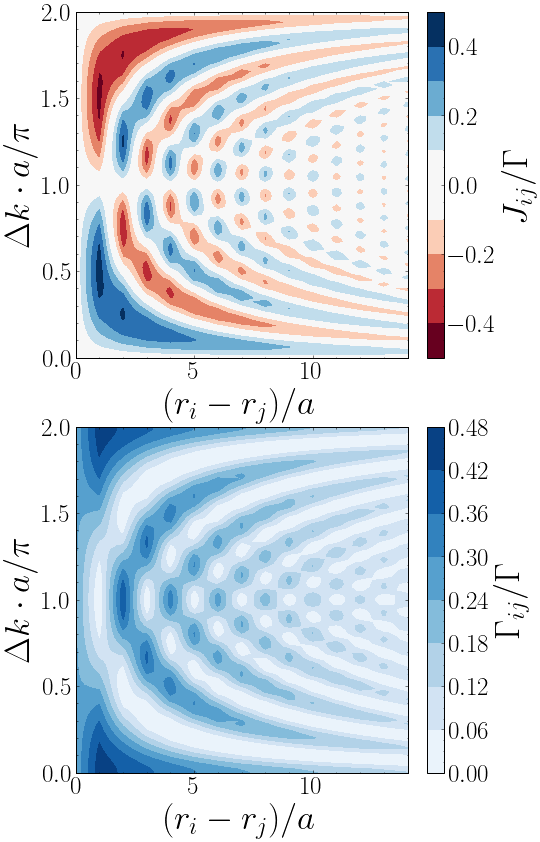

In [5]:
import matplotlib.colors as mcolors
Gauss = GaussianSystem(50)

def countour_J_ij():
    
    # Set parameters
    pump = 0
    l_k = 10
    Gammas = [1/2, 1/2]
    g_s = 0
    g_c = 0
    
    # Distances and momenta we will vary
    set_of_k1s = np.linspace(0, 2*np.pi, 100)
    set_of_ds = np.arange(0, 15)
    
    # Initialize matrix
    J_ij = np.zeros((len(set_of_k1s), len(set_of_ds)))
    Gamma_ij = np.zeros((len(set_of_k1s), len(set_of_ds)))
    
    for (i, k1) in enumerate(set_of_k1s):
        
            # Declare parameters
            kl_s = [0,k1]
            params = Gauss.create_params(Gammas, kl_s, pump, g_c, l_k)
            H_eff = Gauss.get_H_eff(params)
            
            for (j, d) in enumerate(set_of_ds):
                
                J_ij[i,j] = np.real(H_eff[0,d])
                Gamma_ij[i,j] = -np.imag(H_eff[0,d])/2
                
   

    fig, axes = plt.subplots(nrows=2, figsize=(7, 14))
    
    # Use 'coolwarm' colormap for contour plots
    im1 = axes[0].contourf(J_ij, aspect=(set_of_ds[-1]) / 2, extent=[0, set_of_ds[-1], 0, 2], cmap= plt.cm.get_cmap('RdBu', 9), levels=10)
    #im1 = axes[0].contourf(J_ij, aspect=(set_of_ds[-1]) / 2, extent=[0, set_of_ds[-1], 0, 2], cmap= plt.cm.get_cmap('RdBu', 7))
    im2 = axes[1].contourf(Gamma_ij, aspect=(set_of_ds[-1]) / 2, extent=[0, set_of_ds[-1], 0, 2], cmap='Blues')

    axes[0].set_xlabel('$(r_i-r_j)/a$', fontsize=35)
    axes[1].set_xlabel('$(r_i-r_j)/a$', fontsize=35)
    axes[0].set_ylabel('$\Delta k \cdot a/\pi$', fontsize=35)
    axes[1].set_ylabel('$\Delta k \cdot a/\pi$', fontsize=35)

    # Add colorbar for J_ij
    cbar1 = fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.1, pad=0.05)
    cbar1.set_label('$J_{ij}/\Gamma$', fontsize=35)

    # Add colorbar for Gamma_ij
    cbar2 = fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.1, pad=0.05)
    cbar2.set_label('$\Gamma_{ij}/\Gamma$', fontsize=35)

plt.show()

    
countour_J_ij()

Assuming traslational invariance and adding an incoherent pump, this effective Hamiltonian can be diagonalized in the basis of operators of well-defined quasi-momentum $b_k=(1/\sqrt{2\pi})\int dr\;e^{-ikj}b_j$ as follows:
\begin{align}
\sum_{ij}\left(J_{ij}-i\frac{\Gamma_{ij}}{2}\right)b_i^\dagger b_j 
+i\frac{P}{2}\sum_i \;b_i^\dagger b_i\rightarrow \sum_k h(k)b_k^\dagger b_k\,.
\end{align}

With that $h(k)$, one can rewrite the $2\times 2$ blocks of the doubled Hamiltonian in momentum space as follows:

\begin{equation}
\mathcal{H}(k) = 
\begin{pmatrix}
0 & h(k)\\
h^\star(k) & 0
\end{pmatrix} \;.
\end{equation}

From this form, it follows that the topological invariant can be computed as:

\begin{equation}
W =\frac{1}{4\pi i}\int_\text{BZ}dk\;\text{Tr}\left(\tau_z\mathcal{H}(k)^{-1}\partial_k\mathcal{H}(k)\right)    \;,
\end{equation}

with $\tau_z$ being a matrix representation of the artificial chiral symmetry of the doubled Hamiltonian $\mathcal{H}$ i.e. $\tau_z\mathcal{H}\tau_z=-\mathcal{H}$. Besides, in this case with no parametric driving ($g_s=0$), the calculation of the winding number can be further simplified to:

\begin{equation}
W = \frac{1}{2\pi i}\int_\text{BZ}dk\;\partial_k\log h(k) \;,
\end{equation}
We can interpret the role of the parameters in the value of $W$ using the following code:

3.0


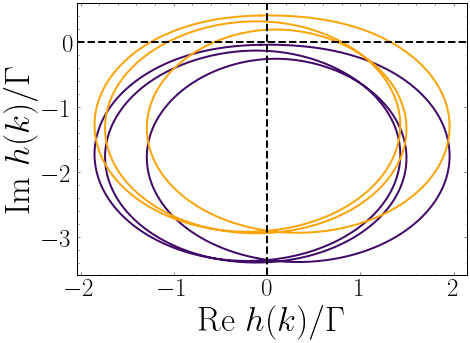

In [6]:
# Set parameters
num_modes = 3
Gammas = [1, 1, 1, 1][:num_modes]
Gammas = np.array(Gammas)/np.sum(Gammas)
kl_s = [0, np.pi/2, -np.pi/3, np.pi/8][:num_modes]
pump = 0.9
g_c = 0.
l_k = 10
set_of_pumps = [0, 0.9]
colors = plt.cm.inferno(np.linspace(0.2, 0.8, 2))
params = Gauss.create_params(Gammas, kl_s, pump, g_c, l_k)
print(Gauss.compute_winding_scalar(params))

def paint_h_k(params):
    
    ks = np.linspace(-np.pi, np.pi, 10000)
    fig, ax = plt.subplots(figsize=(7,5))
    
    for (i,pump) in enumerate(set_of_pumps):
        Re, Im = [], []
        for k in ks: 
            params = Gauss.create_params(Gammas, kl_s, pump, g_c, l_k)
            h = Gauss.get_H_nh_k_space(k, params)[0,0]
            Re.append(np.real(h))
            Im.append(np.imag(h))
        
        ax.plot(Re, Im, linewidth=2, color=colors[i])
    
    ax.set_xlabel('$\\text{Re }h(k)/\Gamma$', fontsize=35)
    ax.set_ylabel('$\\text{Im }h(k)/\Gamma$', fontsize=35)
    ax.axvline(0, color='black', linestyle='dashed', linewidth=2)
    ax.axhline(0, color='black', linestyle='dashed', linewidth=2)
    
paint_h_k(params)

Let us now show the code used to obtain the general phase diagrams presented in our work. We do it using three different methods:
1. Matrix integration: Performing the integral $W =\frac{1}{4\pi i}\int_\text{BZ}dk\;\text{Tr}\left(\tau_z\mathcal{H}(k)^{-1}\partial_k\mathcal{H}(k)\right)$
2. Scalar integration: If $g_s=0$, performing the integral $W = \frac{1}{2\pi i}\int_\text{BZ}dk\;\partial_k\log h(k)$
3. Number of localized singular vectors: A more efficient way to compute $W$ is to get the singular value decomposition $\mathbb{H}=USV^\dagger$ of the dynamical matrix $(\mathbb{H})_{ij}=J_{ij}-i\frac{\Gamma_{ij}}{2}+i\frac{P}{2}\delta_{i,j}$ and count the number of singular vectors (columns of $V$ or $U$) that are localized in the system edge. We can do this by defining a localization metric, as the normalized inverse participation ratio (IPR), and count the number singular vectors with an IPR below a certain threshold.

In [5]:
def normalized_IPR(v):
    v = v/np.linalg.norm(v)
    return (1/np.sum(abs(v)**4))*(1/np.shape(v)[0])

In [271]:
def compute_winding_matrix(omega, params, n=1000, method='matrix_integration', analytical_inverse=False):
        """
        Computes the winding number from the doubled Hamiltonian
        matrix H as:
                      _                  
                 1   |                       dH
        W_1 = -------| dk   Tr[ tau_z  H⁻1 ------]
              4pi i _|                       dk
                       BZ
        
        """
        
        if method=='scalar_integration':
            
            # Set a step in momentum space
            delta_k = 2*np.pi/n
        
            # Define the integrand of the winding integral
            def get_f(k):
            
                # Spectrum
                h = Gauss.get_H_nh_k_space(k, params)[0, 0]
            
                # Derivative
                partial_h = (Gauss.get_H_nh_k_space(k+delta_k, params)[0, 0] 
                             - Gauss.get_H_nh_k_space(k-delta_k, params)[0, 0])/(2*delta_k)
            
                return (1/h)*partial_h
        
            # Separate real and imaginary parts of the integrand
            real_f = lambda k: np.real(get_f(k))
            imag_f = lambda k: np.imag(get_f(k))
        
            # Perform integral
            nu = (1/(2*np.pi*1j))*integrate.quad(real_f, -np.pi, np.pi)[0]
            nu += (1/(2*np.pi))*integrate.quad(imag_f, -np.pi, np.pi)[0]
            
            return np.round(np.real(nu))
        
        if method=='matrix_integration':
            
             # Set a step in momentum space
            delta_k = 2*np.pi/n
        
            # Declare
            tau_z = np.array(np.diag([-1,-1,1,1]), dtype = complex)
        
            # Define integrand function
            def get_F(k):
            
                # Non-Hermitian Hamiltonian
                H_nh = Gauss.get_H_nh_k_space(k, params)
            
                # Double degree of freedom
                H = get_doubled_Hamiltonian(H_nh, omega)
            
                # Get the derivative
                partial_H = (get_doubled_Hamiltonian(Gauss.get_H_nh_k_space(k+delta_k, params), omega)
                             - get_doubled_Hamiltonian(Gauss.get_H_nh_k_space(k-delta_k, params), omega))/(2*delta_k)
            
                if analytical_inverse==True: 
                
                    H_nh = Gauss.get_H_nh_k_space(k, params)
                    det = np.linalg.det(H_nh)
                    
                    if det !=0:
                        
                        H_inv = (1/det)*get_doubled_Hamiltonian(omega, -Gauss.get_H_nh_in_k_space(k, params).transpose())
            
                if analytical_inverse==False: H_inv = np.linalg.inv(H)
              
                return np.trace(tau_z @ np.linalg.inv(H) @ partial_H)
        
            # Separate real and imaginary parts of the integrand
            real_F = lambda k: np.real(get_F(k))
            imag_F = lambda k: np.imag(get_F(k))
        
            # Perform integral
            W1 = (1/(4*np.pi*1j))*integrate.quad(real_F, -np.pi, np.pi)[0]
            W1 += (1/(4*np.pi))*integrate.quad(imag_F, -np.pi, np.pi)[0]
        
            return np.round(np.real(W1))//2
        
        if method=='SVD':
            
            Gauss_small = GaussianSystem(100)
            Gauss_large = GaussianSystem(600)
            H_nh = Gauss_large.get_H_nh(params)
            U, _, _ = np.linalg.svd(H_nh)
            W1 = 0
            IPR = 0
            
            if np.linalg.norm(U[:Gauss.N, -1])==0: index=-2
            else: index = -1
            
            for i in range(Gauss.N):
                
                IPR = normalized_IPR(U[:Gauss.N, index-2*i])
                if IPR<0.15: W1 = W1 + 1
                else: break    
             
            return W1

In [136]:
# Intitialize Gaussian System class
N = 100
Gauss = GaussianSystem(N)

In [267]:
def get_phase_diagram(num_modes, method='SVD', num_points=100):
    """
    Outputs a  matrix with the winding number, sweeping the dissipative length
    (controlling the interaction range) and the incoherent pump amplitude
    """
    # Initialize parameters
    Gammas = np.array([1,1,1])[:num_modes]
    kl_s = np.array([np.pi/2, np.pi/3, np.pi/8])[:num_modes]
    pump = 0.
    Delta = 1
    g_c = 0
    #g_s = 0
    
    # Normalize decays
    Gammas = Gammas/np.sum(Gammas)
    
    # Variables to sweep
    g_ss = np.linspace(0, 1.1, num_points)
    #pumps = np.linspace(0,1.1,num_points)
    exp_lks = np.linspace(-1, 3.5, num_points)
    l_ks = 10**exp_lks
    
    # Initialize output matrix with winding numbers
    Ws = np.zeros((num_points, num_points))
    stability = np.zeros((num_points, num_points))
    
    # If computed as W_1
    
    #for (i, pump) in enumerate(pumps):
    for (i, g_s) in enumerate(g_ss):
        for (j, l_k) in enumerate(l_ks):
            
            params = Gauss.create_params(Gammas, kl_s, pump, g_s, l_k, Delta=Delta, g_c=g_c)
            Ws[i, j] = compute_winding_matrix(0, params, method=method)
            stability[i, j] = Gauss.is_unstable(params)
    
    return Ws, stability

In [133]:
import matplotlib

c_white = matplotlib.colors.colorConverter.to_rgba('white',alpha = 0)
c_black= matplotlib.colors.colorConverter.to_rgba('black',alpha = 1)
cmap_rb = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_white,c_black],512)

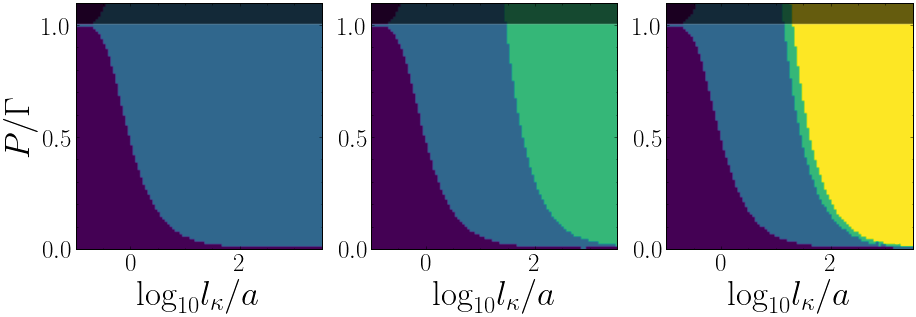

In [153]:
# Incoherent pump only (Delta=g_s=g_c=0)

# Compute phase diagram and stability
W_1, S_1 = get_phase_diagram(1, num_points=100, method='scalar_integration')
W_2, S_2 = get_phase_diagram(2, num_points=100, method='scalar_integration')
W_3, S_3 = get_phase_diagram(3, num_points=100, method='scalar_integration')

# Plot
fig, axes = plt.subplots(ncols=3, figsize=(15, 15))

for (i, (W, S)) in enumerate(zip([W_1, W_2, W_3], [S_1, S_2, S_3])):
    
    W = np.flip(W, axis=0)
    axes[i].imshow(W, cmap='viridis', vmin=0, vmax=3, extent=[-1, 3.5, 0, 1.1])
    axes[0].set_ylabel('$P/\Gamma$', fontsize = 35)
    axes[i].set_xlabel('$\\text{log}_{10}l_\kappa/a$', fontsize=35)
    axes[i].imshow(np.flip(S, axis=0), alpha=0.6, cmap=cmap_rb, extent=[-1, 3.5, 0, 1.1], aspect=4.5/1.1)

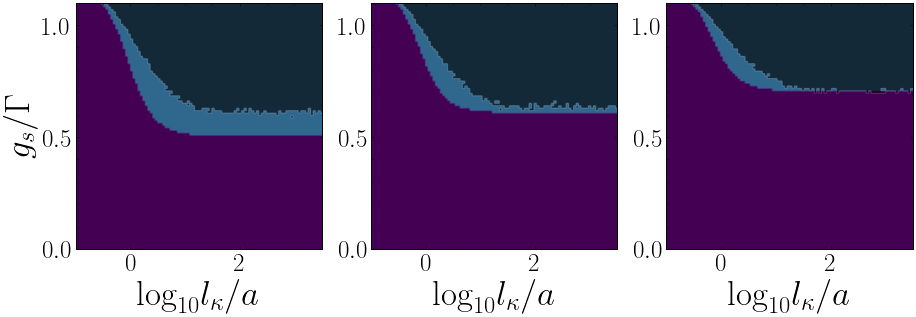

In [270]:
# Local parametric driving only (Delta=1, g_c=P=0)

# Compute phase diagram and stability
W_1, S_1 = get_phase_diagram(1, num_points=100)
W_2, S_2 = get_phase_diagram(2, num_points=100)
W_3, S_3 = get_phase_diagram(3, num_points=100)

# Plot
fig, axes = plt.subplots(ncols=3, figsize=(15, 15))

for (i, (W, S)) in enumerate(zip([W_1, W_2, W_3], [S_1, S_2, S_3])):
    
    W = np.flip(W, axis=0)
    axes[i].imshow(W, cmap='viridis', vmin=0, vmax=3, extent=[-1, 3.5, 0, 1.1])
    axes[0].set_ylabel('$g_s/\Gamma$', fontsize = 35)
    axes[i].set_xlabel('$\\text{log}_{10}l_\kappa/a$', fontsize=35)
    axes[i].imshow(np.flip(S, axis=0), alpha=0.6, cmap=cmap_rb, extent=[-1, 3.5, 0, 1.1], aspect=4.5/1.1)